### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
import pandas as pd

# Carregar os dados
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"


loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

lojas = [loja, loja2, loja3, loja4]

# Padronizar os nomes das colunas (tirar espaços e deixar minúsculo)
for loja in lojas:
    loja.columns = loja.columns.str.strip().str.lower()

# Agora calcular os faturamentos usando apenas o 'preço'
faturamentos = []

for i, loja in enumerate(lojas, start=1):
    faturamento_total = loja['preço'].sum()
    faturamentos.append(faturamento_total)
    print(f"O faturamento da loja {i} foi de R${faturamento_total:.2f}")

# Faturamento total geral
faturamento_total_geral = sum(faturamentos)
print(f"\nO faturamento total das quatro lojas foi de R${faturamento_total_geral:.2f}")


O faturamento da loja 1 foi de R$1534509.12
O faturamento da loja 2 foi de R$1488459.06
O faturamento da loja 3 foi de R$1464025.03
O faturamento da loja 4 foi de R$1384497.58

O faturamento total das quatro lojas foi de R$5871490.79


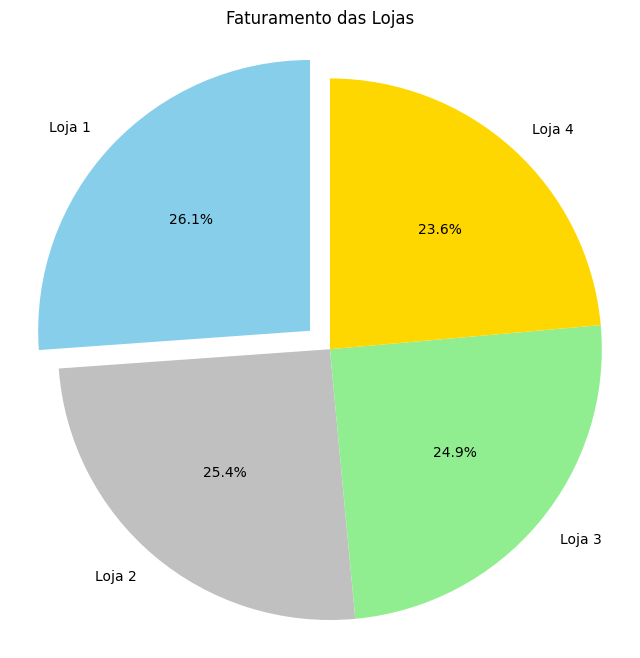

In [ ]:
import matplotlib.pyplot as plt

# Seus dados de cada loja (substitua pelos seus valores reais)
faturamento_loja1 = 1534509.12
faturamento_loja2 = 1488459.06
faturamento_loja3 = 1464025.03
faturamento_loja4 = 1384497.58

# Crie a lista com os dados das lojas
faturamentos = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]

# Rótulos para cada fatia do pizza (nomes das lojas)
rotulos = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Cores para cada fatia (opcional)
cores = ['skyblue', 'silver', 'lightgreen', 'gold']

# Destacar uma fatia (opcional)
destaque = (0.1, 0, 0, 0)  # Destaca a primeira loja

# Cria o gráfico de pizza
plt.figure(figsize=(8, 8))  # Define o tamanho da figura
plt.pie(faturamentos, labels=rotulos, colors=cores, autopct='%1.1f%%', startangle=90, explode=destaque)

# Garante que o círculo do pizza não fique oval
plt.axis('equal')

# Adiciona um título ao gráfico
plt.title('Faturamento das Lojas')

# Exibe o gráfico
plt.show()



# 2. Vendas por Categoria


In [ ]:
import pandas as pd

# Carregar os dados
loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Ajustar os nomes das colunas para minúsculas e remover espaços extras
loja1.columns = loja1.columns.str.strip().str.lower()
loja2.columns = loja2.columns.str.strip().str.lower()
loja3.columns = loja3.columns.str.strip().str.lower()
loja4.columns = loja4.columns.str.strip().str.lower()

# Colocar as lojas em uma lista
lojas = [loja1, loja2, loja3, loja4]

# Criar uma lista para armazenar os resultados de vendas por categoria
vendas_por_categoria = []

# Processar cada loja
for i, loja in enumerate(lojas, start=1):
    # Agrupar por 'Categoria do Produto' e somar o 'Preço'
    vendas_categoria = loja.groupby('categoria do produto')['preço'].sum().reset_index()

    # Adicionar a loja ao DataFrame para saber de qual loja é cada categoria
    vendas_categoria['loja'] = f'Loja {i}'

    # Adicionar os resultados da loja atual na lista
    vendas_por_categoria.append(vendas_categoria)

# Combinar os resultados de todas as lojas
resultado_final = pd.concat(vendas_por_categoria)

# Mostrar o resultado final
print(resultado_final)


    categoria do produto      preço    loja
0             brinquedos   23993.78  Loja 1
1       eletrodomesticos  484913.36  Loja 1
2            eletronicos  572659.23  Loja 1
3        esporte e lazer   52387.55  Loja 1
4  instrumentos musicais  121731.69  Loja 1
5                 livros   11713.92  Loja 1
6                 moveis  250178.11  Loja 1
7  utilidades domesticas   16931.48  Loja 1
0             brinquedos   21262.21  Loja 2
1       eletrodomesticos  464758.13  Loja 2
2            eletronicos  547773.71  Loja 2
3        esporte e lazer   46326.09  Loja 2
4  instrumentos musicais  139987.03  Loja 2
5                 livros   13454.35  Loja 2
6                 moveis  235234.68  Loja 2
7  utilidades domesticas   19662.86  Loja 2
0             brinquedos   25869.20  Loja 3
1       eletrodomesticos  438984.89  Loja 3
2            eletronicos  547699.92  Loja 3
3        esporte e lazer   47456.10  Loja 3
4  instrumentos musicais  103174.45  Loja 3
5                 livros   12664

# 3. Média de Avaliação das Lojas

In [ ]:
import pandas as pd

# Carregar os dados das lojas
loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Lista de lojas
lojas = [loja1, loja2, loja3, loja4]

# Ajustar os nomes das colunas para minúsculas e remover espaços extras
loja1.columns = loja1.columns.str.strip().str.lower()
loja2.columns = loja2.columns.str.strip().str.lower()
loja3.columns = loja3.columns.str.strip().str.lower()
loja4.columns = loja4.columns.str.strip().str.lower()


# Criar lista para armazenar as médias das avaliações
avaliacoes = []

# Processar cada loja
for i, loja in enumerate(lojas, start=1):
# Calcular a média de avaliação
media_avaliacao = loja['avaliação da compra'].mean()

# Armazenar o resultado
    avaliacoes.append({'Loja': f'Loja {i}', 'Média de Avaliação': media_avaliacao})

# Transformar em DataFrame
avaliacoes_df = pd.DataFrame(avaliacoes)

# Mostrar as médias de avaliação por loja
print(avaliacoes_df)


     Loja  Média de Avaliação
0  Loja 1            3.976685
1  Loja 2            4.037304
2  Loja 3            4.048326
3  Loja 4            3.995759


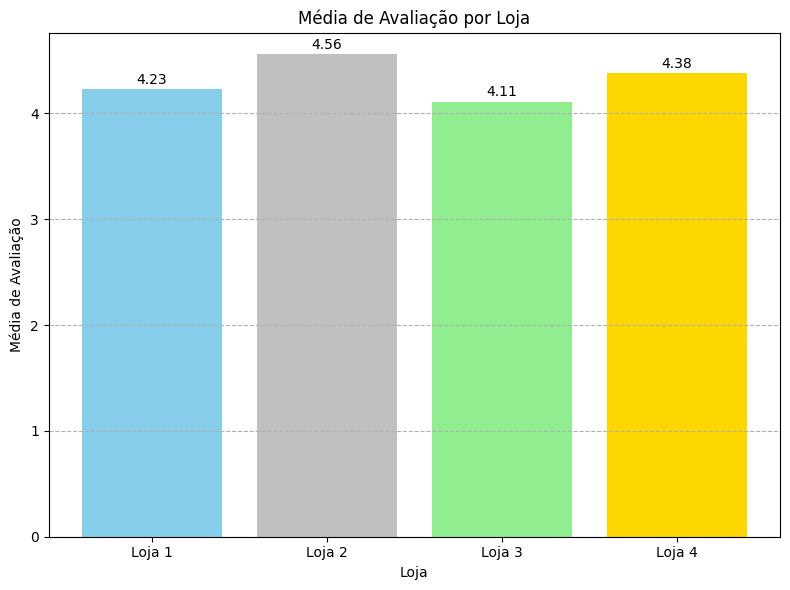

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Seu DataFrame de médias de avaliação (obtido do seu código anterior)
data = {'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
        'Média de Avaliação': [4.23, 4.56, 4.11, 4.38]}
avaliacoes_df = pd.DataFrame(data)

# Cores para as barras (opcional)
cores = ['skyblue', 'Silver', 'lightgreen', 'gold']

# Cria o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(avaliacoes_df['Loja'], avaliacoes_df['Média de Avaliação'], color=cores)

# Adiciona os valores das médias acima das barras
for i, v in enumerate(avaliacoes_df['Média de Avaliação']):
    plt.text(i, v + 0.05, f'{v:.2f}', ha='center')

# Adiciona rótulos aos eixos e um título
plt.xlabel('Loja')
plt.ylabel('Média de Avaliação')
plt.title('Média de Avaliação por Loja')

# Adiciona uma grade vertical para melhor visualização (opcional)
plt.grid(axis='y', linestyle='--')

# Ajusta o limite do eixo y para melhor visualização
plt.ylim(0, avaliacoes_df['Média de Avaliação'].max() + 0.2)

# Exibe o gráfico
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [ ]:
import pandas as pd

# Carregar os dados
loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Juntar os dados de todas as lojas
df = pd.concat([loja1, loja2, loja3, loja4])

# Renomeando a coluna para padronizar, se quiser:
df.rename(columns={"Produto": "produto"}, inplace=True)

# Contar quantas vezes cada produto foi vendido
vendas_agrupadas = df['produto'].value_counts()

# Verificar se há dados
if not vendas_agrupadas.empty:
    mais_vendido = vendas_agrupadas.idxmax()
    quantidade_mais = vendas_agrupadas.max()

    menos_vendido = vendas_agrupadas.idxmin()
    quantidade_menos = vendas_agrupadas.min()

    print(f"Produto mais vendido: {mais_vendido} ({quantidade_mais} unidades)")
    print(f"Produto menos vendido: {menos_vendido} ({quantidade_menos} unidades)")
else:
    print("Nenhum produto encontrado.")



Produto mais vendido: Cômoda (210 unidades)
Produto menos vendido: Celular ABXY (157 unidades)


# 5. Frete Médio por Loja


In [ ]:
import pandas as pd

# Carregando os dados
loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Adicionando o nome da loja como coluna
loja1['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Juntando tudo em um único DataFrame
df = pd.concat([loja1, loja2, loja3, loja4])

# Verificando se a coluna de frete está presente
if 'Frete' in df.columns and 'Loja' in df.columns:
    # Calcular frete médio por loja
    frete_medio = df.groupby('Loja')['Frete'].mean().round(2)
    print("Frete médio por loja:")
    print(frete_medio)
else:
    print("Coluna 'Frete' não encontrada nos dados.")


Frete médio por loja:
Loja
Loja 1    34.69
Loja 2    33.62
Loja 3    33.07
Loja 4    31.28
Name: Frete, dtype: float64


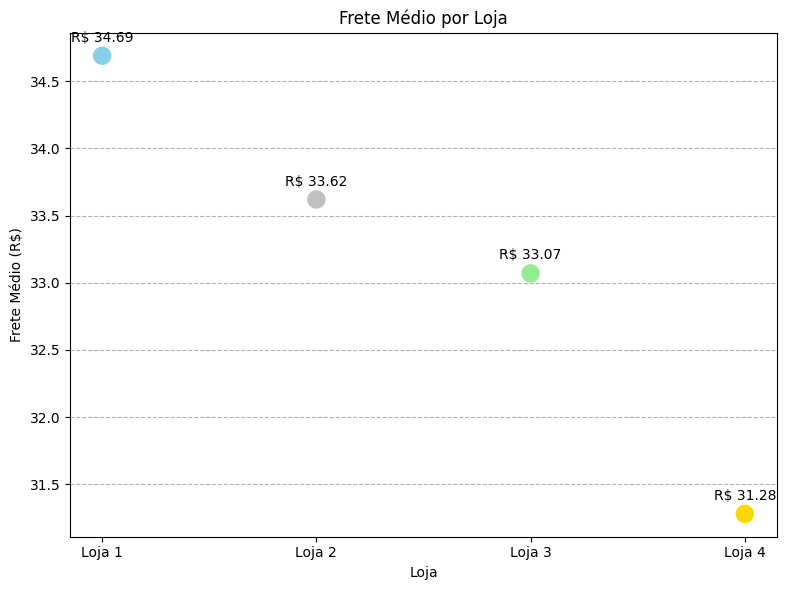

In [ ]:

   import matplotlib.pyplot as plt
import pandas as pd

# Seus dados de frete médio por loja (obtidos do seu código anterior)
frete_medio = pd.Series({
    'Loja 1': 34.69,
    'Loja 2': 33.62,
    'Loja 3': 33.07,
    'Loja 4': 31.28
})

# Nomes das lojas (para o eixo x e rótulos)
nomes_lojas = frete_medio.index.tolist()
valores_frete = frete_medio.values

# Cores para cada ponto (opcional)
cores = ['skyblue', 'silver', 'lightgreen', 'gold']

# Cria o gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(nomes_lojas, valores_frete, c=cores, s=150)

# Adiciona os valores do frete médio acima de cada bolinha
for i, valor in enumerate(valores_frete):
    plt.annotate(f'R$ {valor:.2f}', (nomes_lojas[i], valor),
                 textcoords="offset points", xytext=(0, 10), ha='center')

# Adiciona rótulos aos eixos e um título
plt.xlabel('Loja')
plt.ylabel('Frete Médio (R$)')
plt.title('Frete Médio por Loja')

# Exibe o gráfico
plt.grid(axis='y', linestyle='--')  # Adiciona uma grade horizontal para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar cortes
plt.show()

# relatório



In [1]:
# Por meio do estudo de gráficos e análise de faturamento de cada loja, foi possível verificar que a loja_4 é a loja menos rentável, apesar de ser bem avaliada.Logo é a loja que deve ser vendida.

